# SVM Model

In [5]:
# Import libraries
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [6]:
# Create DataFrame using hist_data function
msftdf = hist_data('MSFT')['MSFT']

In [7]:
# Set x variable list of features
x_var_list = [
 'McGinley',
 'MACD',
 'fast_close',
 'slow_close',
 'fast_vol',
 'slow_vol',
 'bollinger_mid_band',
 'bollinger_upper_band',
 'bollinger_lower_band',
 'Lagged_Return',
 'rsi',
]

# Shift DataFrame values by 1
msftdf[x_var_list] = msftdf[x_var_list].shift(1)

# Drop Na's
msftdf.dropna(subset=x_var_list, inplace = True)
msftdf.dropna(subset=['pctchange'], inplace = True)
msftdf = msftdf.replace([np.inf, -np.inf], np.nan)

# Construct dependent variable
msftdf['positive return'] = np.where(msftdf['pctchange'] > 0, 1.0, 0.0)
# Construct training data
training_start = msftdf.index.min().strftime(format = '%Y-%m-%d')
training_end = '2021-04-01'
# Construct testing and end dates
testing_start = '2021-04-02'
testing_end = msftdf.index.max().strftime(format = '%Y-%m-%d')
# Construct the X_train and y_train datasets
X_train = msftdf[x_var_list][training_start:training_end]
y_train = msftdf['positive return'][training_start:training_end]
# Construct the X test and y test datasets
X_test = msftdf[x_var_list][testing_start:testing_end]
y_test = msftdf['positive return'][testing_start:testing_end]

# Instantiate a linear SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
# Fit the data
classifier.fit(X_train, y_train)
# Make predictions using the test data
predictions = classifier.predict(X_test)
results = pd.DataFrame({
    "Prediction": predictions,
    "Actual": y_test
}).reset_index(drop=True)
results.head()
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
results['Prediction'].replace(0, -1, inplace=True)

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04        46
         1.0       0.53      1.00      0.69        51

    accuracy                           0.54        97
   macro avg       0.77      0.51      0.37        97
weighted avg       0.75      0.54      0.39        97



<AxesSubplot:>

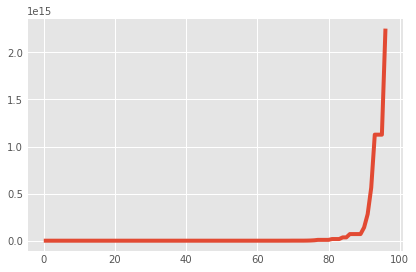

In [8]:
# Graph results
(1 + (results['Actual'] * results['Prediction'])).cumprod().plot()

In [9]:
# Show Predicted vs Actual results
results

,Prediction,Actual
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
92,1.0,1.0
93,1.0,1.0
94,1.0,0.0
95,1.0,0.0


<AxesSubplot:>

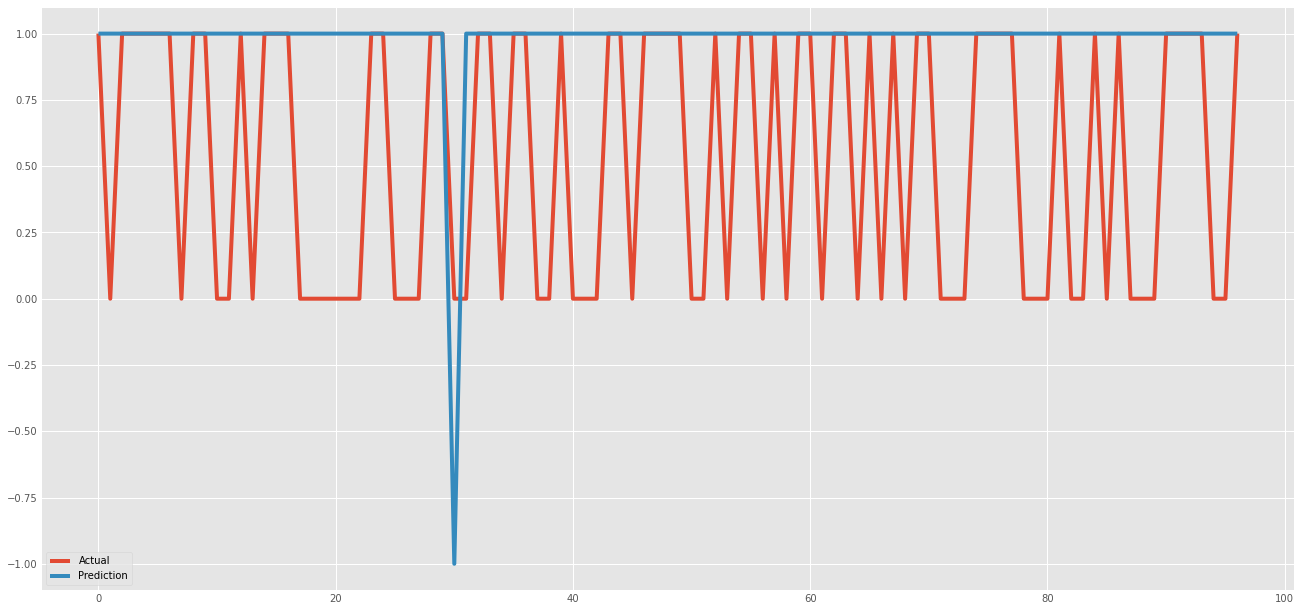

In [11]:
# Plot predicted results vs. actual results
results[['Actual', 'Prediction']].plot(figsize=(20,10))